In [1]:
import networkx as nx

In [7]:
G = nx.Graph() # undirected graph
G = nx.DiGraph() # directed graph
G = nx.MultiGraph() # graph that allows multiple undirected edges between a node pair
G = nx.MultiDiGraph() # graph that allows multiple directed edges between a node pair

# A node of a graph can be any hashable object (with __hash__() and __eq__() implemented properly).
#   In fact, the graph object itself can be a node of other graphs.
# An edge of a graph can have arbitrary attributes.
# Graph is maintained as an adjacency list, that is, { node: {adjacent_node: edge} }

# Some special graphs
nx.complete_graph(10) # complete graph with 10 nodes.
nx.cycle_graph(10) # a cycle with 10 nodes. A chain with two ends joined.
nx.path_graph(10) # a chain structure with 10 nodes.
nx.trivial_graph() # a graph with one node.
nx.null_graph() # an empty graph

# Construct graph from edge list
# Edges will be introduced in detail below
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

In [31]:
G = nx.Graph() # undirected graph

# Adding nodes
G.add_node(1)

# Adding multiple nodes from iterable object
# The parameter can also be a graph, since graph is iterable
G.add_nodes_from([2, 3])
for node in G:
    print(node)

# Get node count
print(G.number_of_nodes())

# Adding nodes with attributes
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# Remove node
G.remove_node(4)
# Remove multiple nodes
G.remove_nodes_from([2, 3, 5])

1
2
3
3


In [35]:
G = nx.Graph() # undirected graph

# Adding edges
G.add_edge(1, 2) # add an edge between node 1 and 2; default edge data=1
G.add_edge(2, 3, weight=0.9) # specify edge data
for edge in G.edges:
    print(edge)

# Get edge count
print(G.number_of_edges())

# Adding multiple edges. Existing edges will be overwritten
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)

elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

# Remove edge
G.remove_edge(1, 2)
# Remove multiple edges. (Seems like there's no error report when deleting non-existent edge)
G.remove_edges_from([(2, 3), (1, 4), (1, 'w')])

(1, 2)
(2, 3)
2


In [43]:
# Access adjacency list
G = nx.path_graph(3)
for node in G: 
    print(G.adj[node])
    print(G.degree[node])
print(list(G.adjacency()))
print(G.adj.items())

# Manipulate edge data by indexing
G[1][2]["data"] = "hello world"
print(G[1][2])
print(G.edges[1, 2])

{1: {}}
1
{0: {}, 2: {}}
2
{1: {}}
1
[(0, {1: {}}), (1, {0: {}, 2: {}}), (2, {1: {}})]
ItemsView(AdjacencyView({0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}}}))
{'data': 'hello world'}
{'data': 'hello world'}


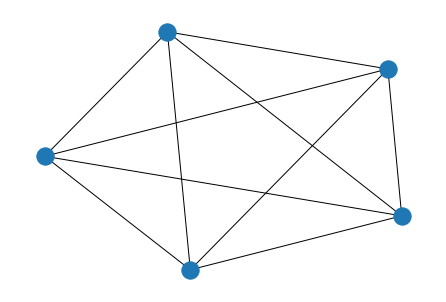

In [44]:
# Drawing

G = nx.complete_graph(5)
nx.draw(G)

[1, 2, 3, 4]
shortest path length:
2
maximum flow config from 1 to 4:
(2, {1: {2: 1, 3: 1}, 2: {1: 0, 3: 0, 4: 1}, 3: {2: 0, 4: 1, 1: 0}, 4: {3: 0, 2: 0}})
all paths sorted by length:
[1, 3, 4]
[1, 2, 4]
[1, 3, 2, 4]
[1, 2, 3, 4]
all shortest paths:
[1, 2, 4]
[1, 3, 4]


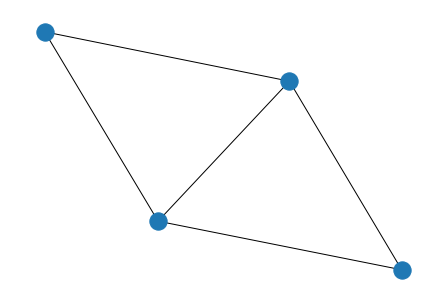

In [56]:
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 1), (2, 3, 1), (3, 4, 1), (1, 3, 1), (2, 4, 1)])
nx.draw(G)

# Figure 1(c): shortest path length (for length distribution)
# doc: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length
print("shortest path length:")
print(nx.shortest_path_length(G, 1, 4))

# Figure 2(b): maximum flow (full capacity test): 
# doc: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html
print("maximum flow config from 1 to 4:")
print(nx.algorithms.maximum_flow(G, 1, 4, capacity="weight"))

# Figure 9: k shortest path: 
# doc: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.simple_paths.shortest_simple_paths.html#networkx.algorithms.simple_paths.shortest_simple_paths
print("all paths sorted by length:")
paths = nx.algorithms.shortest_simple_paths(G, 1, 4)
for path in paths:
    print(path)

# all shortest paths(ECMP): 
# doc: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.all_shortest_paths.html#networkx.algorithms.shortest_paths.generic.all_shortest_paths
print("all shortest paths:")
paths = nx.all_shortest_paths(G, 1, 4)
for path in paths:
    print(path)